# Importy

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# parametry bibliotek & magicmethods
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("darkgrid")

In [2]:
# import danych
DATA = pd.read_csv("data_clean_20190420.csv")

# Eksploracja danych

In [3]:
# weryfikacja
DATA.sample(n=10)

,area,building,building_floors,chamber,construction_year,floor,market,price,standard,url
1633,113.33,kamienica,4.00,3,1900.00,0.00,wtórny,450000.00,do remontu,https://www.otodom.pl/oferta/mieszkanie-ul-mic...
1540,82.32,apartamentowiec,2.00,4,2018.00,2.00,pierwotny,560000.00,do wykończenia,https://www.otodom.pl/oferta/osiedle-ptasie-ka...
1988,40.00,NaN,nan,4,nan,3.00,pierwotny,246000.00,NaN,https://www.otodom.pl/oferta/jedyny-taki-apart...
1264,47.30,blok,4.00,2,1980.00,0.00,wtórny,210000.00,do remontu,https://www.otodom.pl/oferta/super-lokalizacja...
437,72.00,blok,3.00,4,nan,1.00,wtórny,370000.00,do zamieszkania,https://www.otodom.pl/oferta/atrakcyjne-slonec...
422,67.00,apartamentowiec,nan,3,2020.00,2.00,pierwotny,444000.00,do wykończenia,https://www.otodom.pl/oferta/nowa-inwestycja-b...
1944,53.83,blok,10.00,3,2019.00,7.00,pierwotny,344512.00,do wykończenia,https://www.otodom.pl/oferta/nowe-mieszkanie-z...
1867,114.48,kamienica,4.00,4,1930.00,1.00,wtórny,520000.00,do remontu,https://www.otodom.pl/oferta/katowice-srodmies...
781,82.28,apartamentowiec,5.00,4,nan,3.00,pierwotny,560000.00,do wykończenia,https://www.otodom.pl/oferta/nowe-ptasie-miesz...
1045,52.55,apartamentowiec,5.00,3,nan,0.00,pierwotny,333692.00,do wykończenia,https://www.otodom.pl/oferta/nowa-inwestycja-m...


In [4]:
# Wstępna weryfikacja danych
print(f"Liczba rekordów: {DATA.shape[0]}, Liczba kolumn: {DATA.shape[1]} \n")
print("*"*50, "\n")
print("Braki w poszczególnych kolumnach: \n")
missings = len(DATA) - DATA.count().sort_values(ascending=True)
print(missings, "\n")
print("*"*50, "\n")
print("Braki w poszczególnych kolumnach [%]: \n")
print(missings.apply(lambda x: round(x/DATA.shape[0], 2)* 100), "\n")
print("*"*50, "\n")
print("Typy danych \n")
print(DATA.dtypes)

Liczba rekordów: 2576, Liczba kolumn: 10 

************************************************** 

Braki w poszczególnych kolumnach: 

construction_year    1426
standard              855
building              387
building_floors       243
floor                  74
area                    0
chamber                 0
market                  0
price                   0
url                     0
dtype: int64 

************************************************** 

Braki w poszczególnych kolumnach [%]: 

construction_year   55.00
standard            33.00
building            15.00
building_floors      9.00
floor                3.00
area                 0.00
chamber              0.00
market               0.00
price                0.00
url                  0.00
dtype: float64 

************************************************** 

Typy danych 

area                 float64
building              object
building_floors      float64
chamber                int64
construction_year    float64
floor      

In [5]:
# Przegląd rozkładu zmiennych ilościowych
DATA.describe()

,area,building_floors,chamber,construction_year,floor,price
count,2576.00,2333.00,2576.00,1150.00,2502.00,2576.00
mean,62.47,6.08,2.80,2001.56,2.83,365962.60
std,38.28,3.51,1.22,32.10,2.77,237454.79
min,0.00,1.00,1.00,1880.00,0.00,60000.00
25%,42.27,4.00,2.00,1993.00,1.00,258500.00
50%,51.99,5.00,3.00,2019.00,2.00,306201.25
75%,70.75,8.00,3.00,2019.00,4.00,409176.00
max,834.08,25.00,10.00,2021.00,11.00,5665000.00


e:\kodowanko\python\bootcamp\projekt\venv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\kodowanko\python\bootcamp\projekt\venv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


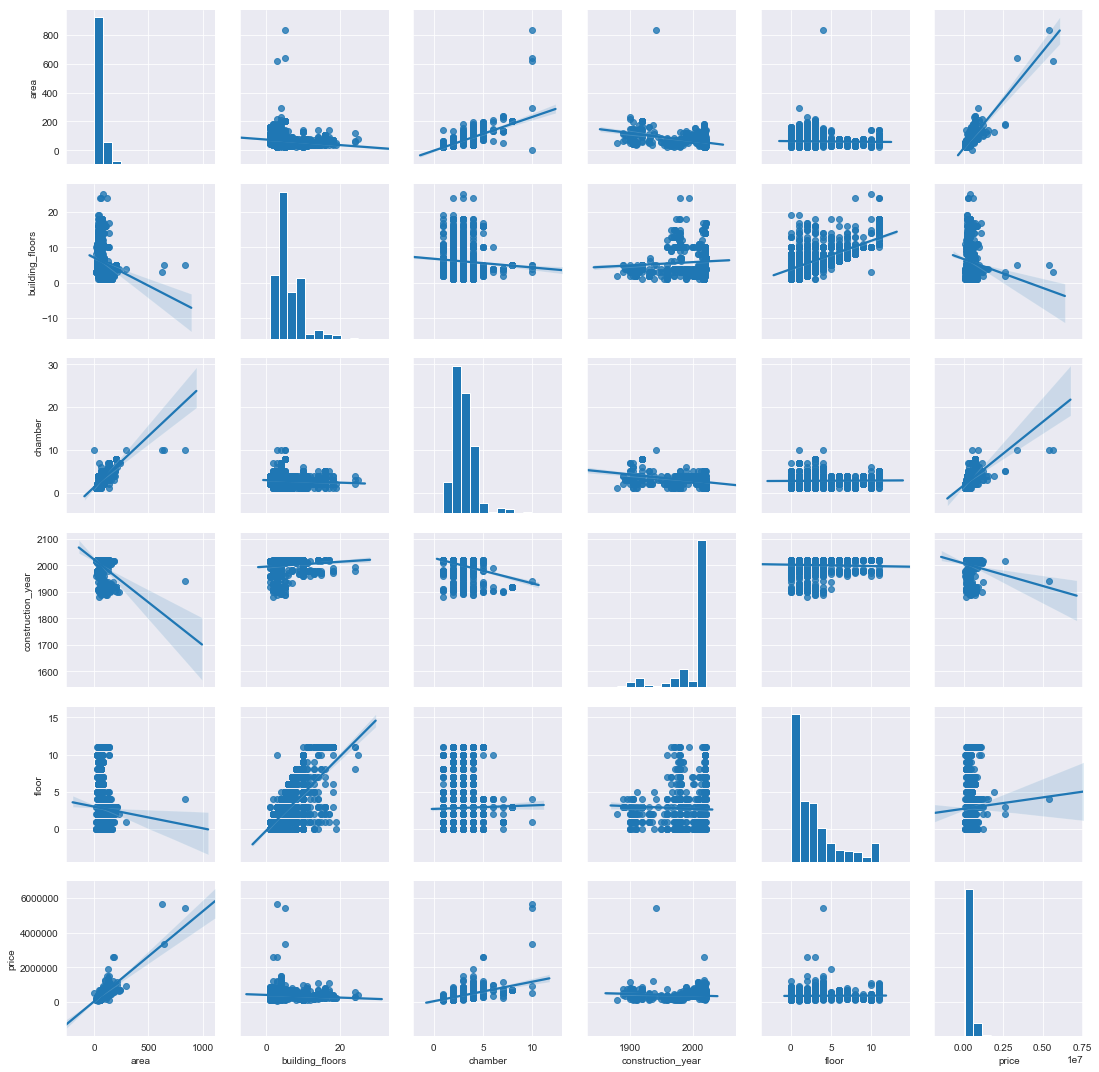

In [6]:
# Przegląd zależności pomiędzy danymi
sns.pairplot(DATA, kind="reg")

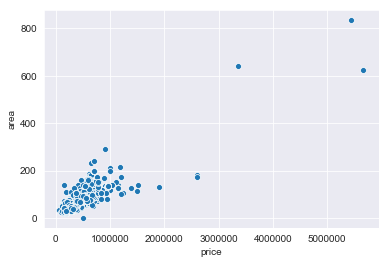

In [7]:
# Zależność pomiędzy ceną i powierzchnią
sns.scatterplot(DATA["price"], DATA["area"])

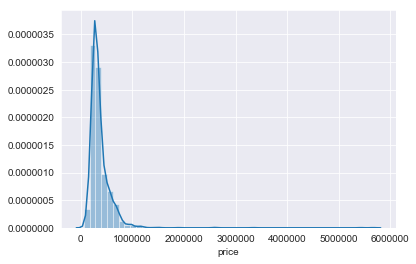

In [8]:
# histogram ceny
sns.distplot(DATA["price"])

[(0, 1000000)]

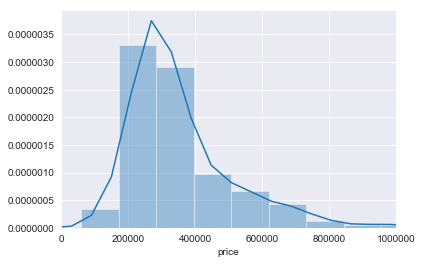

In [11]:
# histogram ceny bez wartości odstających
sns.distplot(DATA["price"]).set(xlim=(0, 1000000))